 # $Telco$ $Churn$

# **Goals:**

* Discover the drivers of customer churn within the Telco company.

* Use drivers to built a model that can predict if a Telco customer will churn.

## Imports

In [1]:
import pandas as pd
import numpy as np


import wrangle as w
import explore as e
import model as m
randomseed = 123

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

# Acquire:

* Data acquire from Codeup Database 10/27/22

* It contained  7043 rows and 24 columns before cleaning

* Each row represents a Telco customers

* Each column represents a feature related to the customer.

In [2]:
# acquire telco data 
df = w.get_telco_data()

# Prepare:

prepare actions:

* Removed columns that contain unuseful information.
* Removed columns that contain redundant information.
* Removed 11 observations with whitespace in total charges column.
* Checked columns were the appropriate data type.
    * Total charges was converted to appropriate numeric data type.
* Null values where not found
* Outliers have not been removed
* Encoded categorical variables
* Split data into train, validate and test 
    * Approximately: train 56%, validate 24%, test 20%
    * Stratified on 'churn'



###                                                        <h1><center>Data Dictionary</center></h1>     
| Feature | Definition |
| :- | :- |
| Gender | Whether a customer is male or female |
| Senior Citizen | Whether a customer is Senior Citizen (1) or not (0) |
| Partner | Whether the customer has a partner or not |
| Dependents | Whether the customer has dependents or not |
| Tenure | Number of months the customer has stayed with the company |
| PhoneService | Whether the customer has a phone service or not |
| MultipleLines | Whether the customer has multiple lines or not (Yes, No, No phone service)|
| InternetService | Customer’s internet service provider (DSL, Fiber optic, No internet srvice)|
| OnlineSecurity | Whether the customer has online security or not (Yes, No, No internet service) |
| Additional Features | Encoded and values for categorical data and scaled versions continuous data|

In [3]:
# cleaning data
df = w.prep_telco(df)

# split data: train, validate and test
train, validate, test = w.split_telco_data(df)

# Looking at the data

In [4]:
train.head(10)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_service_No,phone_service_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_No,paperless_billing_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,8331-ZXFOE,Female,0,No,No,58,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,71.10,4299.20,No,One year,DSL,Credit card (automatic),1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0
1915,2790-XUYMV,Male,0,No,Yes,71,Yes,Yes,Yes,Yes,No,No,No,No,Yes,85.45,6028.95,No,One year,Fiber optic,Credit card (automatic),0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0
5054,7107-UBYKY,Female,0,Yes,Yes,35,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,25.75,882.55,No,Month-to-month,None,Electronic check,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0
2355,3373-YZZYM,Male,0,Yes,Yes,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,19.20,19.20,No,Month-to-month,None,Mailed check,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1
6279,8883-GRDWQ,Male,1,No,No,20,Yes,No,Yes,No,No,Yes,No,No,No,54.00,1055.90,No,One year,DSL,Mailed check,0,1,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1
6992,9921-ZVRHG,Female,0,No,No,14,Yes,Yes,No,No,Yes,No,No,No,Yes,80.45,1072.00,Yes,Month-to-month,Fiber optic,Electronic check,1,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0
3614,5129-HHMZC,Female,0,Yes,No,43,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,86.45,3574.50,No,Two year,DSL,Credit card (automatic),1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0
4352,6135-OZQVA,Female,0,No,No,7,Yes,Yes,Yes,No,No,No,No,No,Yes,53.65,404.35,No,Month-to-month,DSL,Electronic check,1,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0
6845,9722-UJOJR,Male,0,Yes,Yes,29,Yes,No,No,No,No,No,No,No,Yes,70.75,1974.80,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0
3782,5320-BRKGK,Female,0,Yes,Yes,58,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,75.80,4415.75,No,Two year,DSL,Mailed check,1,0,0,1,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1


# Data Summary

In [5]:
train.describe()

,senior_citizen,tenure,monthly_charges,total_charges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_service_No,phone_service_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_No,paperless_billing_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000
mean,0.161290,32.775210,64.805131,2316.775641,0.498095,0.501905,0.514859,0.485141,0.697231,0.302769,0.094742,0.905258,0.481331,0.094742,0.423927,0.487173,0.220218,0.292609,0.431039,0.220218,0.348743,0.430023,0.220218,0.349759,0.490475,0.220218,0.289307,0.393447,0.220218,0.386335,0.388367,0.220218,0.391415,0.409703,0.590297,0.549911,0.207010,0.243078,0.342393,0.437389,0.220218,0.218948,0.227330,0.327407,0.226314
std,0.367845,24.709604,30.294804,2284.984394,0.500060,0.500060,0.499843,0.499843,0.459514,0.459514,0.292896,0.292896,0.499715,0.292896,0.494242,0.499899,0.414447,0.455018,0.495284,0.414447,0.476633,0.495142,0.414447,0.476954,0.499973,0.414447,0.453498,0.488577,0.414447,0.486971,0.487441,0.414447,0.488129,0.491841,0.491841,0.497566,0.405215,0.428997,0.474570,0.496127,0.414447,0.413586,0.419161,0.469327,0.418498
min,0.000000,1.000000,18.250000,18.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,34.700000,396.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,30.000000,70.250000,1414.800000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,56.000000,90.300000,3893.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.0

# Explore:

## How often does churn occur?

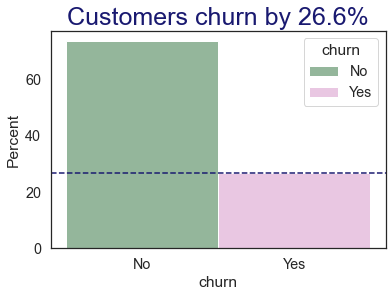

In [6]:
e.get_churn_mean_bar(train)

 * **It appears that about 26.6% of Telco customers churn.**

## Do customer who churn have higher monthly charges?

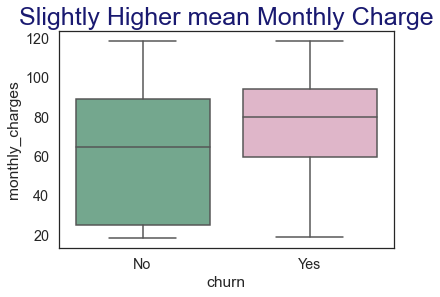

In [7]:
# Obtain boxplot displaying mean of monthly charges
e.get_monthly_charges(train)

* **The mean monthly charges of customers who churn is slightly higher than the mean monthly charges of customers who do not churn.** 

**I will now conduct a T-test to test for a significant difference between the mean of monthly charges of customers who churn and the mean oc monthly charges of customers who do not churn.**

* The confidence interval is 95%
* Alpha is set to 0.05 
* p/2 will be compared to alpha

$H_0$: Mean tenure of Telco customers who churn == mean tenure of Telco customers who do not churn.

$H_a$: Tean tenure of Telco customers who churn != mean tenure of Telco customers who do not churn.

In [8]:
# Stats T-Test result
e.get_ttest_monthly_charges(train)

 t-stat:  14.0896
 p-value/2:  0.0


The p-value/2 is less than the alpha. **There is  evidence to support that customers who churn on average pay higher monthly charges than customers who do not churn.** Based on this statistical finding I believe that monthly charges is a driver of customer churn.Adding an encoded version of this feature to the model will likely increase the model's accuracy.


## Is the mean tenure of customers who churn lower?

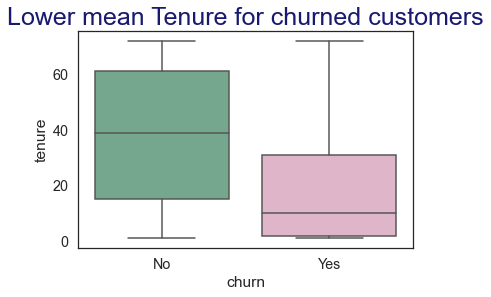

In [9]:
# Obtain boxplot on tenure vs churn
e.get_boxplot_tenure(train)

* **We can see that the tenure mean of customers who churn  is less than the tenure mean of customers who do not churn.**

**I will now conduct a T-test to determine if there on average customers who churn have a lower tenure than customers who do not churn.**

* The confidence interval is 95%
* Alpha is set to 0.05 
* p/2 will be compared to alpha

$H_0$: Mean tenure of Telco customers who churn >= mean tenure of Telco customers who do not churn.

$H_a$: Tean tenure of Telco customers who churn < mean tenure of Telco customers who do not churn.

In [10]:
# obtsin T-test for tenure vs churn
e.get_ttest_tenure(train)

False
 t-stat:-25.77
 p-value/2:0.0


The p-value/2 is less than alpha. **Therefore we have evidence to support that customors who churn have a tenure average that is lower than customers who do not churn.** Based on this statistical finding I believe that tenure is a driver of customer churn.Adding an encoded version of this feature to the model will likely increase the model's accuracy.**

## Does having Senior Citizen status affect churn?

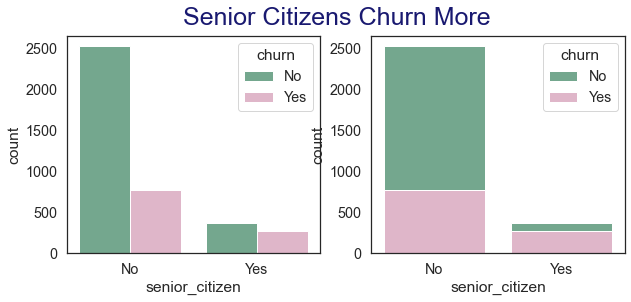

In [11]:
# Obtain bar graph for senior Citizen count
e.get_bar_senior(train)

* **We can see that the population count of churned senior citizens is closer to the total population of senior citizens.**

**I will now conduct a chi-square test to determine if there is an association between senior citizen status and churn.**

* The confidence interval is 95%
* Alpha is set to 0.05 

$H_0$: There is **no** relationship between a customers with senior status and churn.

$H_a$: There is a relationship between a customers senior status and churn.

In [12]:
# Obtain chi-square test
e.get_chi2_senior(train)

 Chi-Square99.7192
 p-value:0.0


The p-value is less thant the alpha. **Therefore there is evidence to support that a customer senior citizen status has an association with churn.** I believe that senior citizen status is a driver of churn. Adding an encoded version of this feature to the model will likely increase the mode's accuracy. 

## Does contract type affect churn?

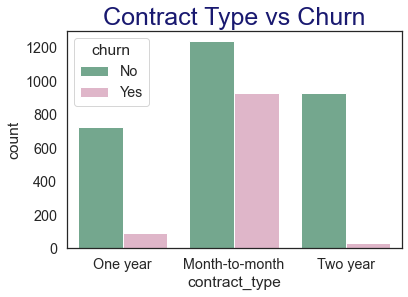

In [13]:
# Obtain plot for contract type vs churn
e.get_plot_contract(train)

* **It seems that customers with a two-year contracts churn less than customers with month-to-month contract.**

**I will now conduct a chi-square test to determine if there is an association between contract type and churn.**

* The confidence interval is 95%
* Alpha is set to 0.05 

$H_0$: There is **no** relationship between contract type and churn.

$H_a$: There is a relationship between contract type and churn.

In [14]:
# Obtain chi-square on Contract type
e.get_chi2_contract(train)

 Chi-Square:664.6572
 p-value:0.0


The p-value is less than alpha. **There is evidence to support that tenure has an association with churn.** I believe that tenure is a driver of churn. Adding an encoded version of this feature to the model will likely increase the mode's accuracy.

# Exploration Summary

* Monthly Charges is a driver of churn
* Senior Citizen status is a driver of churn
* Tenure is a driver of churn
* Contract type is a driver of churn
* Partner is a driver of churn
* Gender is not a driver of churn

# Features that will be included in my model

* **Monthly charges**  has a significant statistical relationship to churn
* **Senior Citizen**  has a significant statistical relationship to churn
* **Tenure**  has a significant statistical relationship to churn
* **Contract type** has a significan statistical relationship to churn
* **Partner**  has a significant statistical relationship to churn

# Features that will be not included in my model

* **Gender** did not have a statistical significant relationship to churn.
* **Other features** have unknow significance to churn at the moment
    * Given more time I would determined if these other features would result in any model gains

# Modeling:

* Accuracy is the metric use in the models.
    * Accuracy helps gauge the percentage correct predictions.
* Churn customers makeup 26.5% of the data 
* by guessing non-churn for every customer one could achieve an accuracy of 73.5%
* 73.5% will be the baseline accuracy I use for this project 
* I will evaluate my top model of Decision Tree, KNN, and Logistic Regression on validate data
* Models will be evaluated on train and validate data
* The model that performs the best will then be evaluated on test data

In [15]:
# prep data for modeling
x_train,y_train,x_validate,y_validate, x_test, y_test = m.model_prep(train,validate,test)

## Decision Tree

In [16]:
# Get Decision Tree results
m.get_tree_model(x_train,y_train,x_validate,y_validate)

Accuracy of Decision Tree on train data is 0.7899415798831597 about 78.99%
Accuracy of Decision Tree on validate data is 0.7766587677725119about 77.67%
Difference between train and validate accuracy: 0.0133


**The accuracy of the Decision Tree model is above the baseline in both train and validate.** 

## KNN

In [17]:
# Get KNN model results
m.get_knn_model(x_train,y_train,x_validate,y_validate)

Accuracy of KNN on train data is 0.8016256032512065 about 80.16%
Accuracy of KNN on validate data is 0.7802132701421801 about 78.02%
Difference between train and validate accuracy: 0.0214


**The accuracy of the Decision Tree model is above the baseline in both train and validate.** 

## Logistic Regression

In [18]:
# Get Logic Regression model results
m.get_logit_model(x_train,y_train,x_validate,y_validate)

Accuracy of Logistic Regression on train data is 0.7896875793751588 about 78.97%
Accuracy of Logistic Regression on validate data is 0.7784360189573459 about 77.84%
Difference between train and validate accuracy: 0.0113


**The accuracy of the Decision Tree model is above the baseline in both train and validate.** 

# Comparing Models

* All Models performed above the baseline in both train and validate data
* Since all models performed well I will select the Model with the least accuracy diffirence between train and validate
* I will select the Logistic Regression as the final model.

# Logistic regression on Test data

In [19]:
m.get_logit_model(x_train,y_train,x_test,y_test, True)

Accuracy of Logistic Regression on train data is 0.7896875793751588 about 78.97%
Accuracy of Logistic Regression on test data is 0.8052594171997157 about 80.53%
Difference between validate and test accuracy: -0.0156


## Modeling Summary

* Decision Tree, KNN and Logistic Regression models all performed aboved the baseline
* With test data Logistic Regression Model did better than the baseline by 7% in terms of accuracy.

# Conclusion

## Exploration



* About 26.5% of Telco customers churn.
* Customers who churn tend to:
    * have a higher a monthly charge
    * lower tenure mean
* Contract type, partner status and senior status have an association with churn 
* Gender has no influence on churn 

## Modeling

**The final model performed well above the baseline by 7% in terms of accuracy.**

## Recommendations

* Have appealing incentives for customers to sign a two-year contract.
* Run a promotion to lower monthly charges for new customers.
* Give discounts to senior citizens

## Next Steps

* Explore the statistical significance of other features in regards to churn.
* Use bivariate data to explore if other factors are causing senior citizens to churn.
* Use bivariate data to explore what other services  are utilized by customers with two-year contracts.